#Loading the data

In [1]:
install.packages("GGally")
install.packages("cluster")
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("NbClust")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(tidyverse)
library(ggplot2)
library(broom)
library(GGally)
library(NbClust)
library(cluster)
library(dplyr)

# Load the dataset
df <- read.csv("diabetes_dataset.csv")

# Convert Outcome to a factor (categorical variable) for better plotting
df$Outcome <- as.factor(df$Outcome)
levels(df$Outcome) <- c("Non-Diabetic", "Diabetic")

head(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<fct>
1,6,148,72,35,0,33.6,0.627,50,Diabetic
2,1,85,66,29,0,26.6,0.351,31,Non-Diabetic
3,8,183,64,0,0,23.3,0.672,32,Diabetic
4,1,89,66,23,94,28.1,0.167,21,Non-Diabetic
5,0,137,40,35,168,43.1,2.288,33,Diabetic
6,5,116,74,0,0,25.6,0.201,30,Non-Diabetic


In [5]:

summary(df)


  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
         Outc

#Exploratory Analysis


*  Ahmed Moatasem
*  abdelrhman Alsayed



In [6]:
colnames(df)

[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     
[9] "Outcome"

# 1) Average glucose levels among patients with and without diabetes

In [7]:
# Calculate average
avg_glucose <- df %>%
  group_by(Outcome) %>%
  summarise(Mean_Glucose = mean(Glucose, na.rm = TRUE))

print(avg_glucose)


# A tibble: 2 × 2
  Outcome      Mean_Glucose
  <fct>               <dbl>
1 Non-Diabetic         110.
2 Diabetic             141.


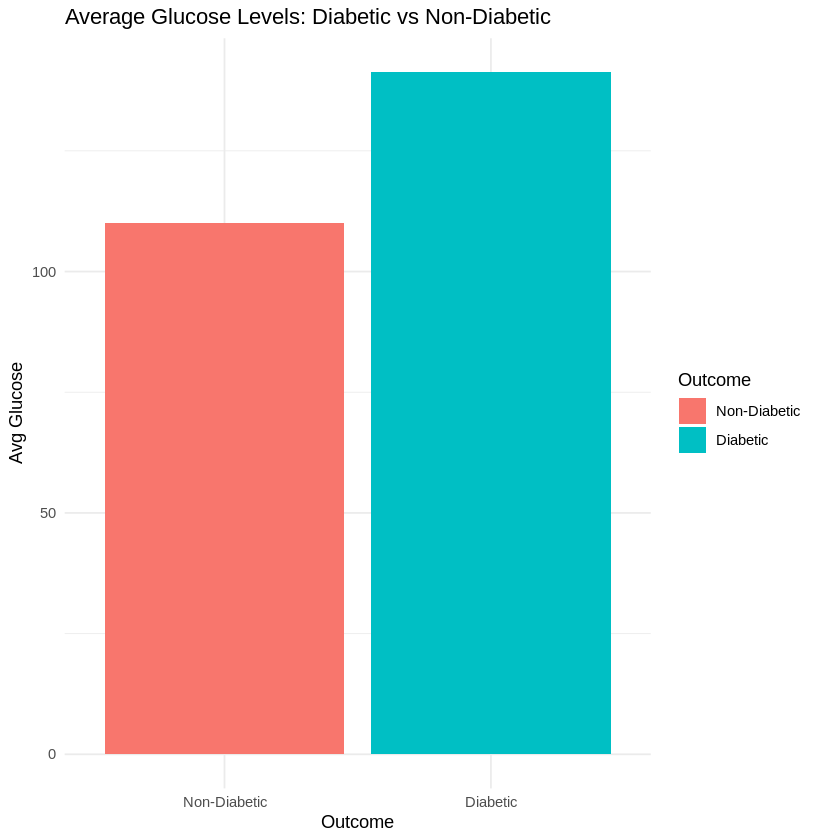

In [8]:

# Plot
ggplot(avg_glucose, aes(x = Outcome, y = Mean_Glucose, fill = Outcome)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "Average Glucose Levels: Diabetic vs Non-Diabetic", y = "Avg Glucose")

# Dot plot with mean lines between the two means of bot diabetic and non
    


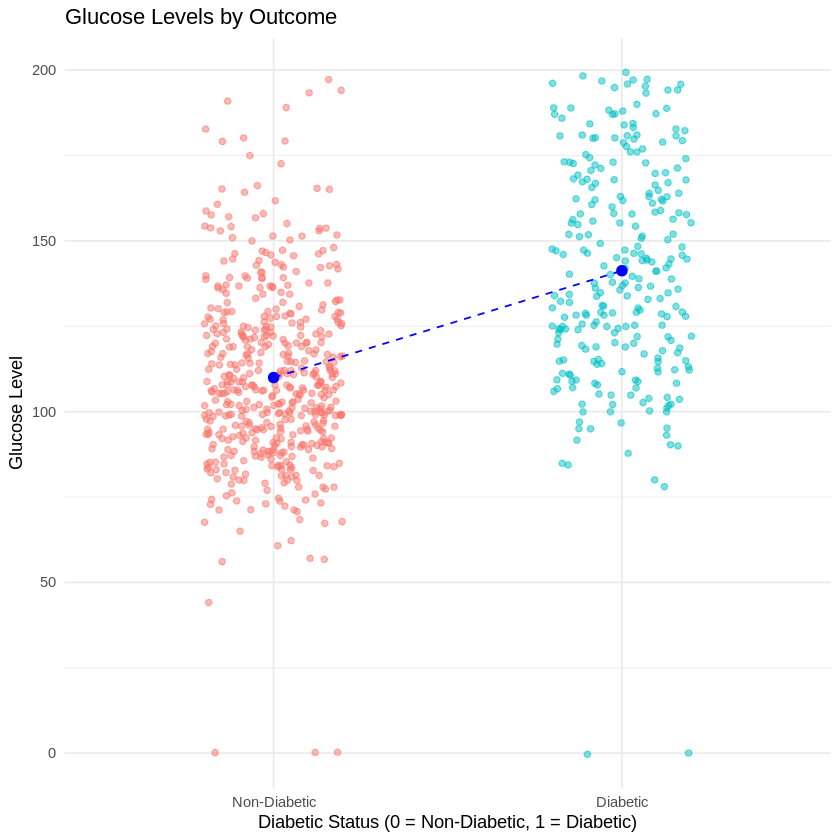

In [9]:
# Dot plot with mean lines
ggplot(df, aes(x = Outcome, y = Glucose, color = Outcome)) +
  geom_jitter(width = 0.2, alpha = 0.5) +
  stat_summary(fun = mean, geom = "point", shape = 20, size = 4, color = "blue") +
  stat_summary(fun = mean, geom = "line", aes(group = 1), color = "blue", linetype = "dashed") +
  labs(
    title = "Glucose Levels by Outcome",
    x = "Diabetic Status (0 = Non-Diabetic, 1 = Diabetic)",
    y = "Glucose Level"
  ) +
  theme_minimal() +
  theme(legend.position = "none")


#2) Average age of patients with and without diabetes


In [10]:
avg_age <- summarise(group_by(df, Outcome), Average_Age = mean(Age))
print(avg_age)

# A tibble: 2 × 2
  Outcome      Average_Age
  <fct>              <dbl>
1 Non-Diabetic        31.2
2 Diabetic            37.1


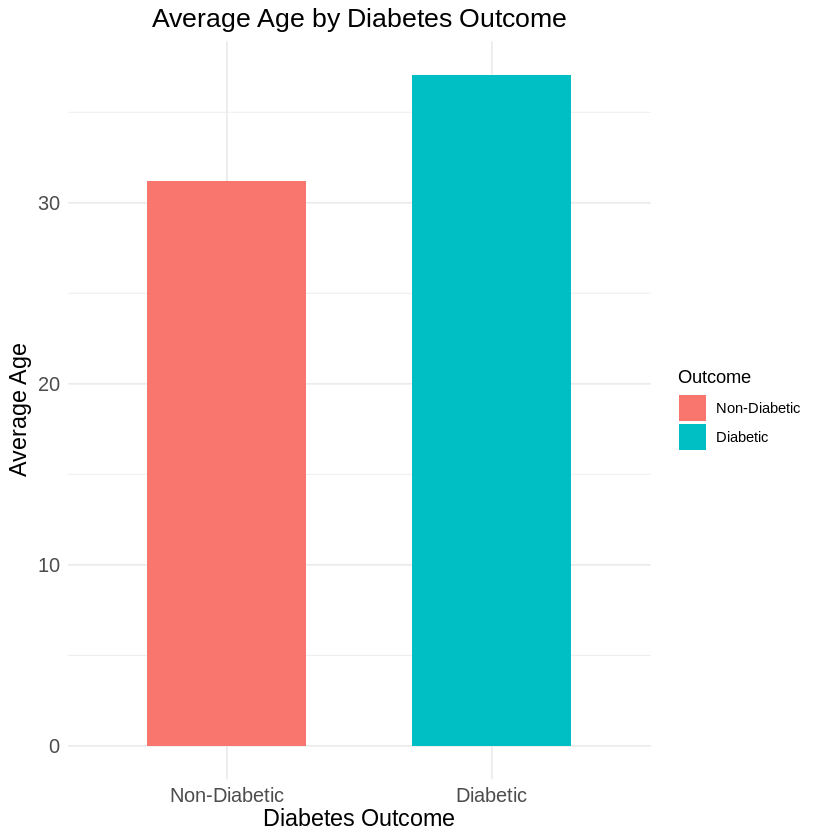

In [11]:

#  bar plot for average age
ggplot(avg_age, aes(x = Outcome, y = Average_Age, fill = Outcome)) +
  geom_bar(stat = "identity", width = 0.6) +
  labs(
    title = "Average Age by Diabetes Outcome",
    x = "Diabetes Outcome",
    y = "Average Age"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )


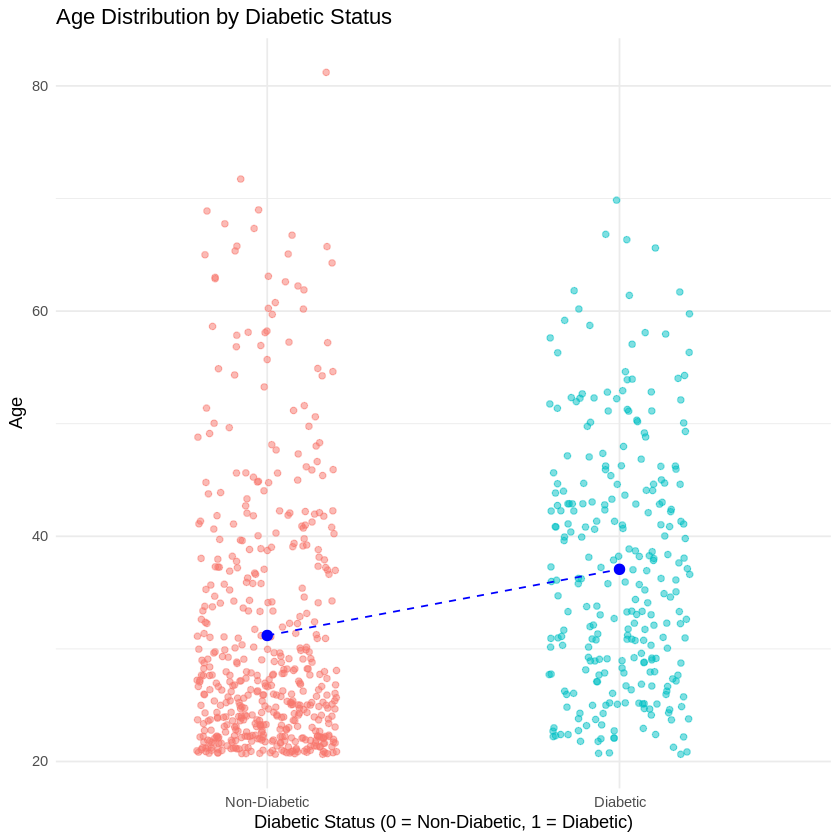

In [12]:
# Dot plot with mean lines for average age
ggplot(df, aes(x = Outcome, y = Age, color = Outcome)) +
  geom_jitter(width = 0.2, alpha = 0.5) +  # Adds individual data points with slight jitter for clarity
  stat_summary(fun = mean, geom = "point", shape = 20, size = 4, color = "blue") +  # Adds the mean as a point
  stat_summary(fun = mean, geom = "line", aes(group = 1), color = "blue", linetype = "dashed") +  # Adds a dashed line connecting means
  labs(
    title = "Age Distribution by Diabetic Status",
    x = "Diabetic Status (0 = Non-Diabetic, 1 = Diabetic)",
    y = "Age"
  ) +
  theme_minimal() +
  theme(legend.position = "none")  # Removes legend as the color is self-explanatory


# 3) Average blood pressure measurements across diabetic and non-diabetic groups

In [13]:
avg_bp <- df %>%
  group_by(Outcome) %>%
  summarise(Mean_BP = mean(BloodPressure, na.rm = TRUE))

print(avg_bp)



# A tibble: 2 × 2
  Outcome      Mean_BP
  <fct>          <dbl>
1 Non-Diabetic    68.2
2 Diabetic        70.8


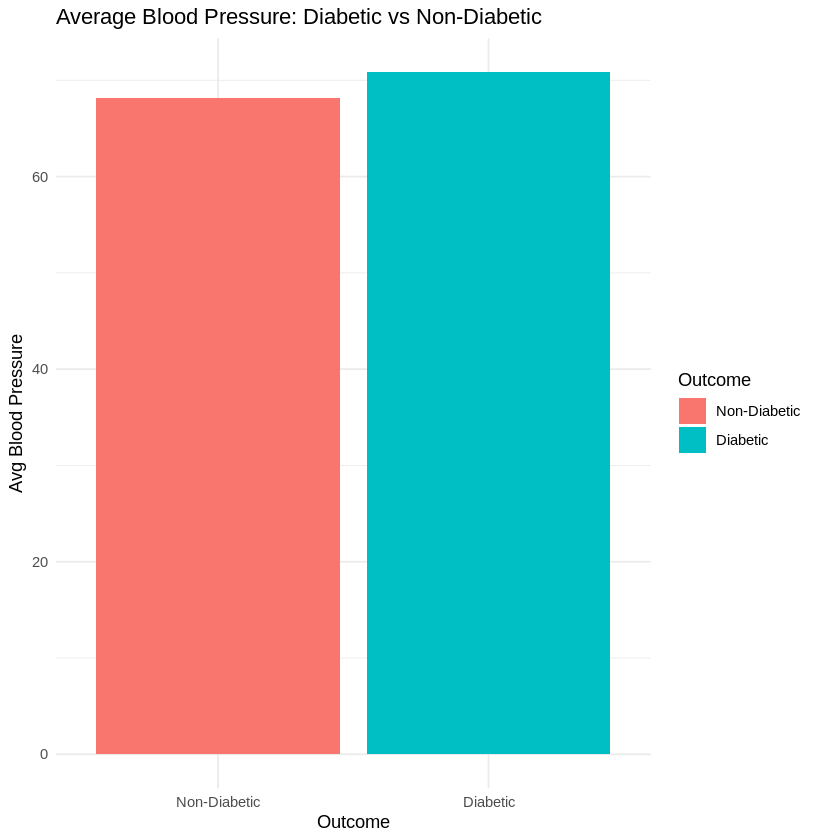

In [14]:
ggplot(avg_bp, aes(x = Outcome, y = Mean_BP, fill = Outcome)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "Average Blood Pressure: Diabetic vs Non-Diabetic", y = "Avg Blood Pressure")

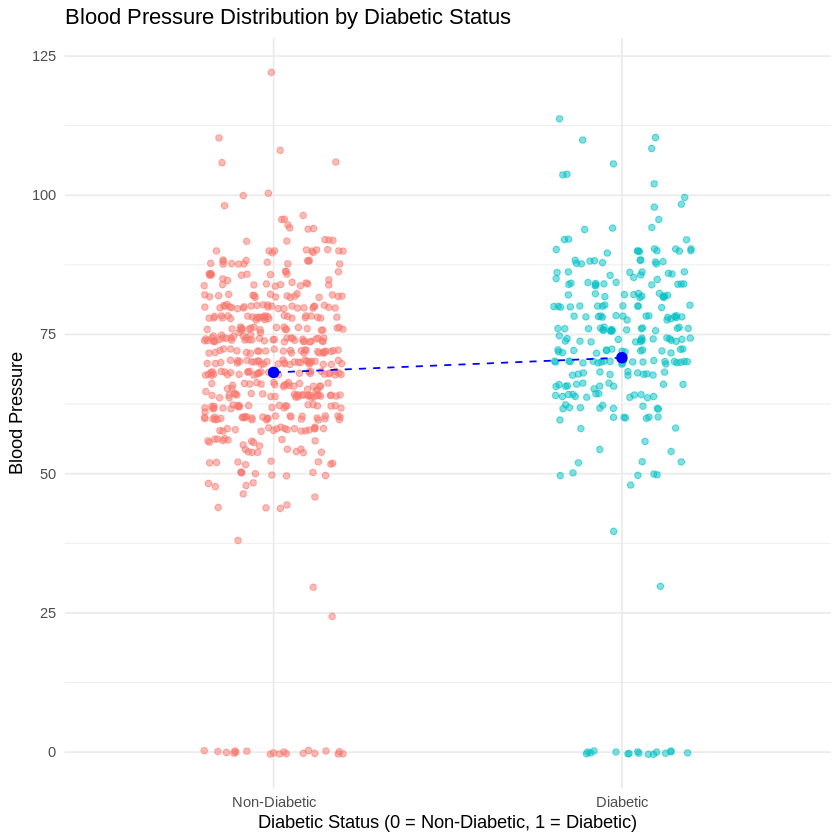

In [15]:
ggplot(df, aes(x = Outcome, y = BloodPressure, color = Outcome)) +
  geom_jitter(width = 0.2, alpha = 0.5) +  # Adds individual data points with slight jitter
  stat_summary(fun = mean, geom = "point", shape = 20, size = 4, color = "blue") +  # Adds the mean as a point
  stat_summary(fun = mean, geom = "line", aes(group = 1), color = "blue", linetype = "dashed") +  # Dashed line connecting means
  labs(
    title = "Blood Pressure Distribution by Diabetic Status",
    x = "Diabetic Status (0 = Non-Diabetic, 1 = Diabetic)",
    y = "Blood Pressure"
  ) +
  theme_minimal() +
  theme(legend.position = "none")


# 4) Average BMI of diabetic versus non-diabetic patients

In [16]:
avg_bmi <- summarise(group_by(df, Outcome), Average_BMI = mean(BMI))
print(avg_bmi)

# A tibble: 2 × 2
  Outcome      Average_BMI
  <fct>              <dbl>
1 Non-Diabetic        30.3
2 Diabetic            35.1


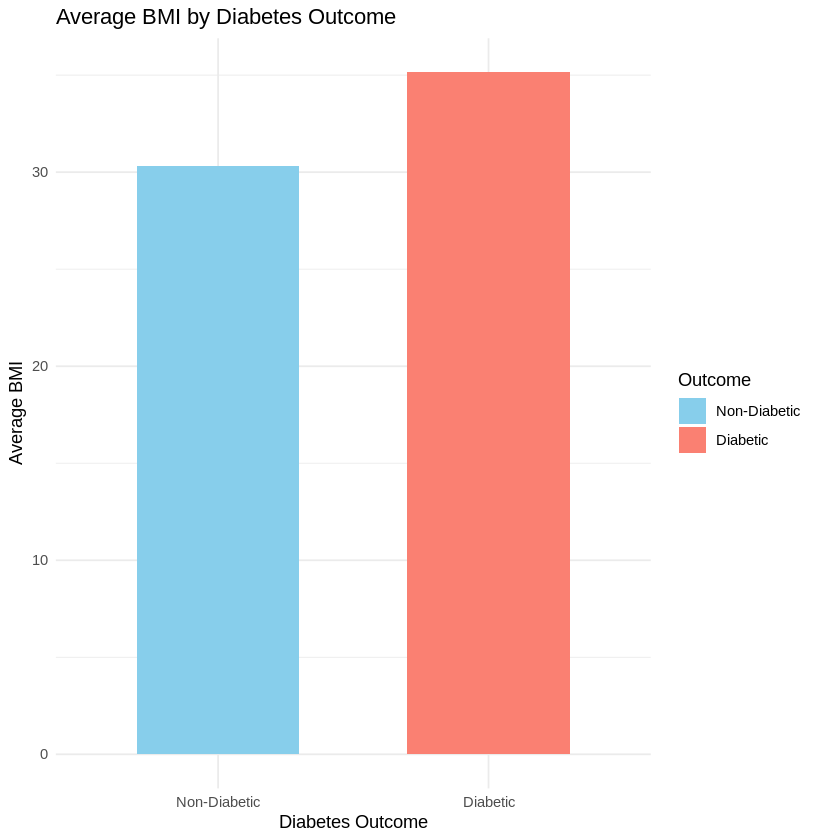

In [17]:
# Bar plot for average BMI
ggplot(avg_bmi, aes(x = Outcome, y = Average_BMI, fill = Outcome)) +
  geom_bar(stat = "identity", width = 0.6) +
  labs(
    title = "Average BMI by Diabetes Outcome",
    x = "Diabetes Outcome",
    y = "Average BMI"
  ) +
  scale_fill_manual(values = c("Non-Diabetic" = "skyblue", "Diabetic" = "salmon")) +
  theme_minimal()


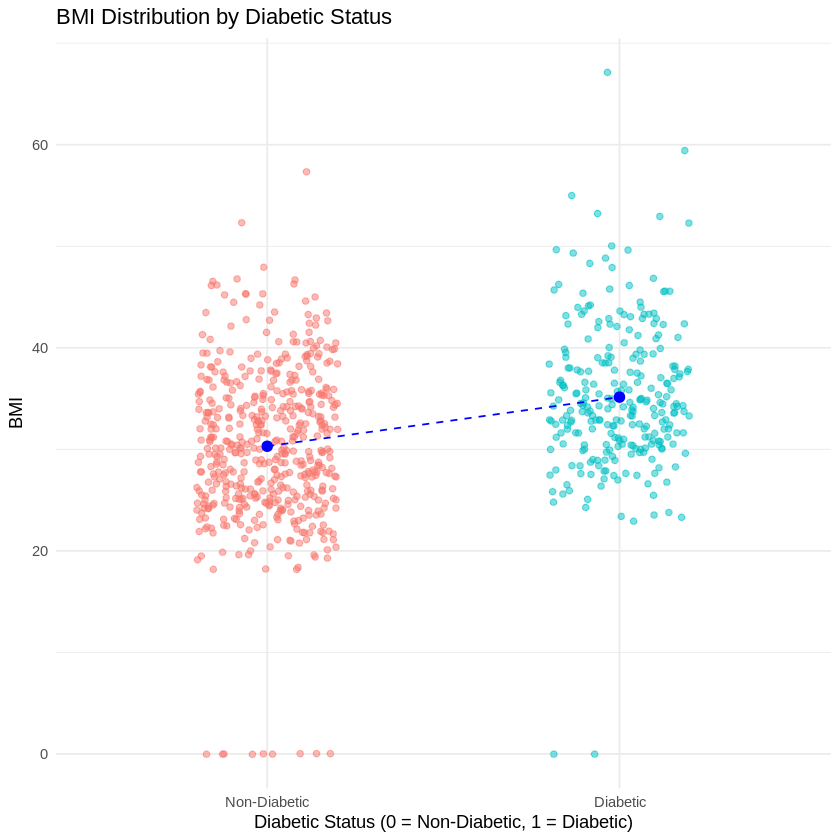

In [18]:
# Dot plot with mean lines for average BMI
ggplot(df, aes(x = Outcome, y = BMI, color = Outcome)) +
  geom_jitter(width = 0.2, alpha = 0.5) +  # Adds individual data points with slight jitter
  stat_summary(fun = mean, geom = "point", shape = 20, size = 4, color = "blue") +  # Adds the mean as a point
  stat_summary(fun = mean, geom = "line", aes(group = 1), color = "blue", linetype = "dashed") +  # Dashed line connecting means
  labs(
    title = "BMI Distribution by Diabetic Status",
    x = "Diabetic Status (0 = Non-Diabetic, 1 = Diabetic)",
    y = "BMI"
  ) +
  theme_minimal() +
  theme(legend.position = "none")

# 5) Rate of diabetes among patients in the dataset

In [19]:
diabetes_rate <- mean(df$Outcome == "Diabetic")
print(paste("Diabetes Rate:", diabetes_rate))

[1] "Diabetes Rate: 0.348958333333333"


In [20]:
# Calculate diabetes and non-diabetes rates
diabetes_rate <- mean(df$Outcome == "Diabetic")
non_diabetes_rate <- 1 - diabetes_rate

# Create a data frame for plotting
rate_data <- data.frame(
  Outcome = c("Diabetic", "Non-Diabetic"),
  Rate = c(diabetes_rate, non_diabetes_rate)
)


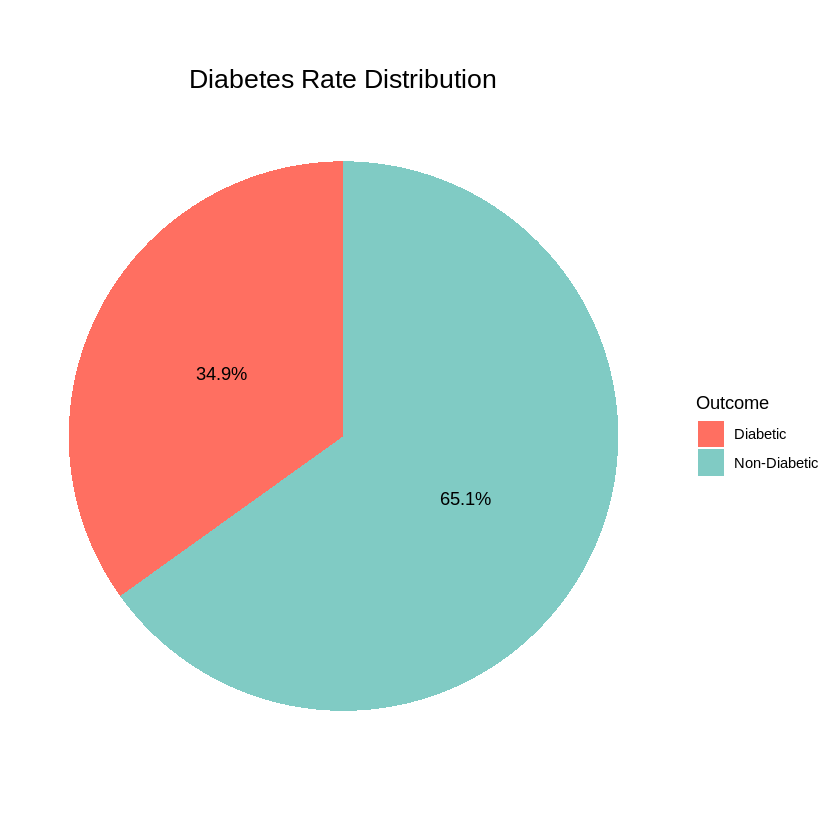

In [21]:
# Add percentage labels to the pie chart
ggplot(rate_data, aes(x = "", y = Rate, fill = Outcome)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  scale_fill_manual(values = c("Diabetic" = "#FF6F61", "Non-Diabetic" = "#80CBC4")) +
  labs(
    title = "Diabetes Rate Distribution",
    x = "",
    y = ""
  ) +
  geom_text(aes(label = paste0(round(Rate * 100, 1), "%")), position = position_stack(vjust = 0.5)) +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16)
  )


# 6) Distribution of BMI values among all patients


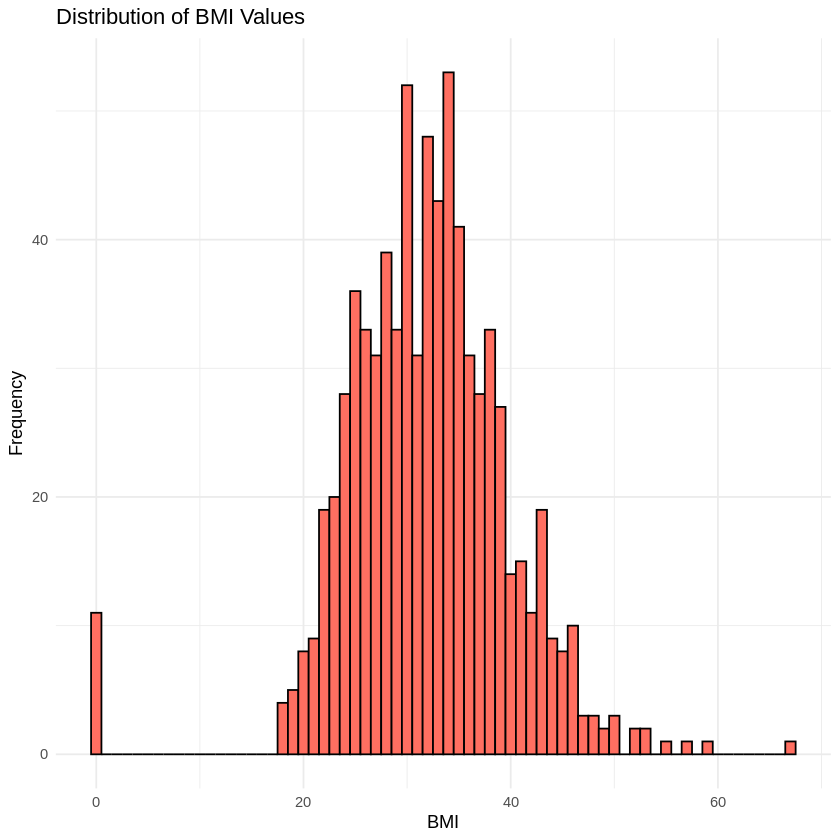

In [22]:
ggplot(df, aes(x = BMI)) +
  geom_histogram(binwidth = 1, fill = "#FF6F61", color = "black") +
  theme_minimal() +
  labs(title = "Distribution of BMI Values", x = "BMI", y = "Frequency")

# 7) Distribution of DPF values for diabetic and non-diabetic patients

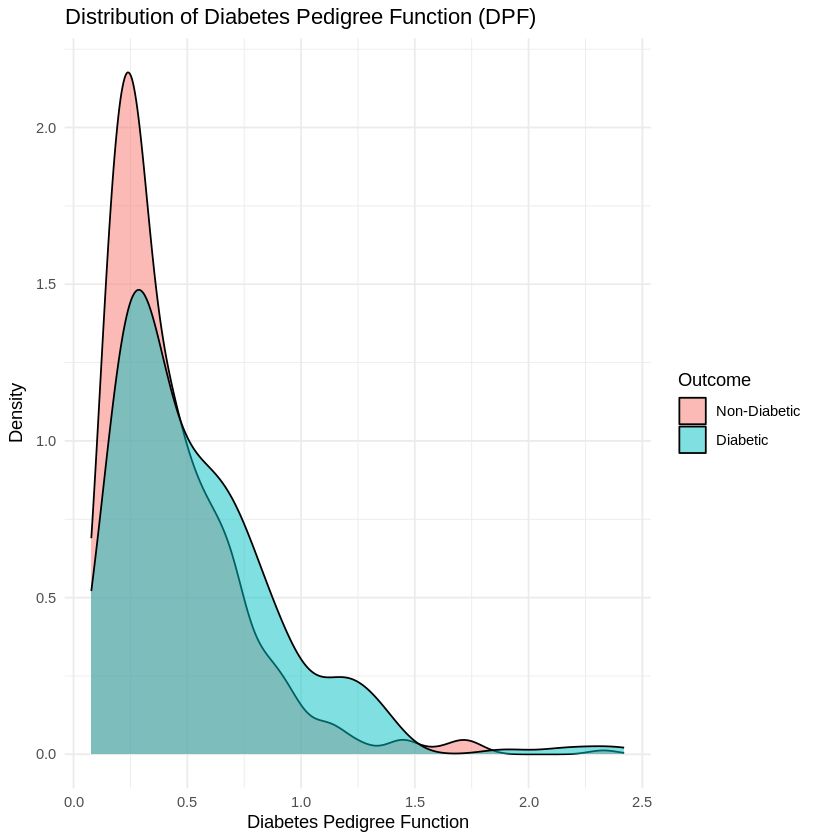

In [23]:
ggplot(df, aes(x = DiabetesPedigreeFunction, fill = Outcome)) +
  geom_density(alpha = 0.5) +
  theme_minimal() +
  labs(title = "Distribution of Diabetes Pedigree Function (DPF)",
       x = "Diabetes Pedigree Function", y = "Density")

# 8) Relationship between number of pregnancies and diabetes occurrence

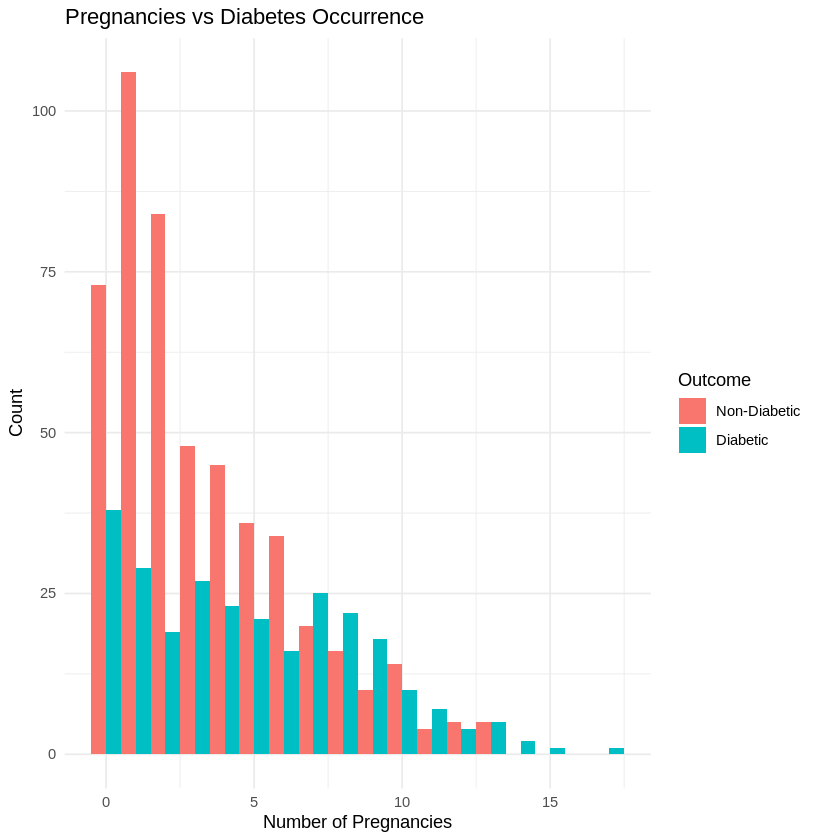

In [24]:
ggplot(df, aes(x = Pregnancies, fill = Outcome)) +
  geom_histogram(binwidth = 1, position = "dodge") +
  theme_minimal() +
  labs(title = "Pregnancies vs Diabetes Occurrence", x = "Number of Pregnancies", y = "Count")

#Correlation between glucose levels and BMI

In [25]:
# Correlation between glucose levels and BMI
correlation <- cor(df$Glucose, df$BMI, use = "complete.obs")
print(paste("Correlation between Glucose and BMI:", correlation))

[1] "Correlation between Glucose and BMI: 0.221071069458983"


`geom_smooth()` using formula = 'y ~ x'


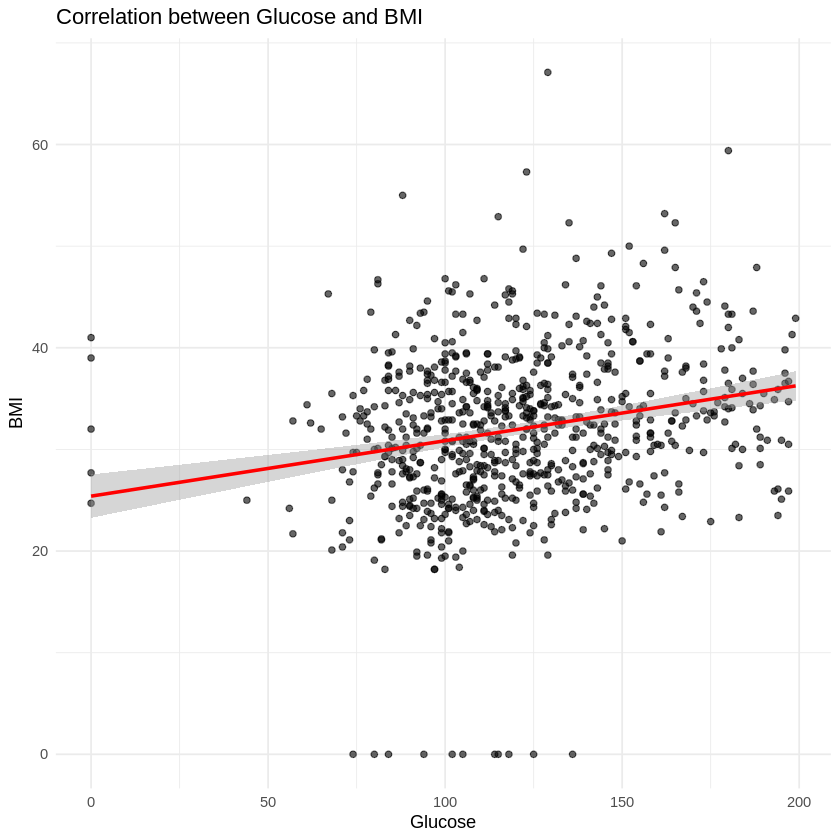

In [26]:
ggplot(df, aes(x = Glucose, y = BMI)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  ggtitle("Correlation between Glucose and BMI") +
  xlab("Glucose") + ylab("BMI") +
  theme_minimal()

Trend of glucose levels with age among diabetic and non-diabetic patients

`geom_smooth()` using formula = 'y ~ x'


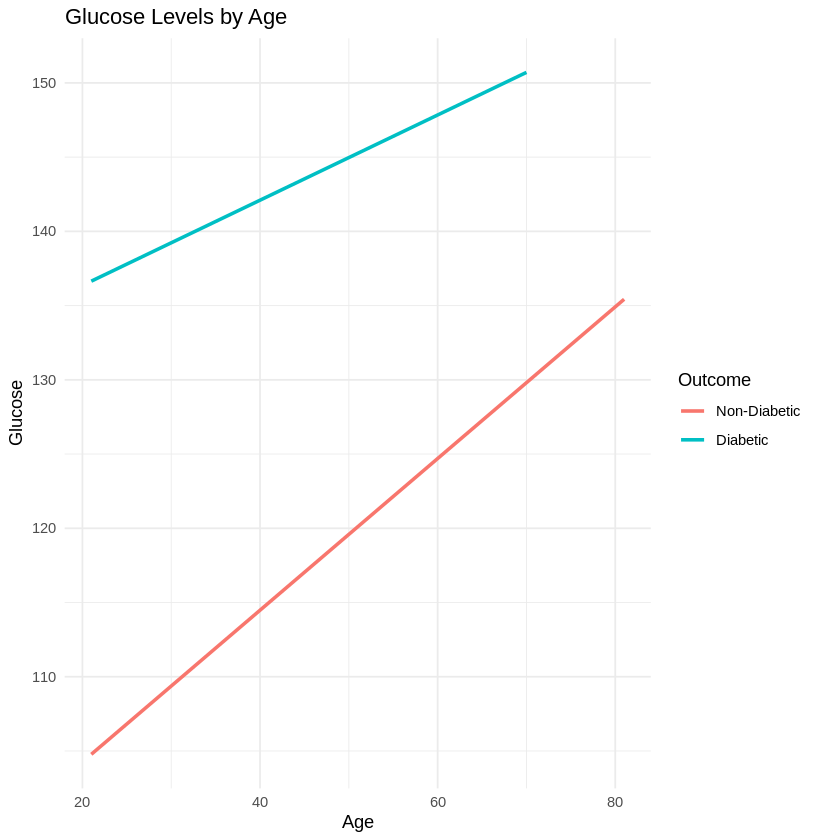

In [27]:
ggplot(df, aes(x = Age, y = Glucose, color = Outcome)) +
  geom_smooth(method = "lm", se = FALSE) +
  theme_minimal() +
  labs(title = "Glucose Levels by Age", x = "Age", y = "Glucose")

# Relationship between Pregnancies and Diabetes


In [28]:
# Calculate average
print(df %>% group_by(Outcome) %>% summarise(Mean_Pregnancies = mean(Pregnancies)))

# A tibble: 2 × 2
  Outcome      Mean_Pregnancies
  <fct>                   <dbl>
1 Non-Diabetic             3.30
2 Diabetic                 4.87


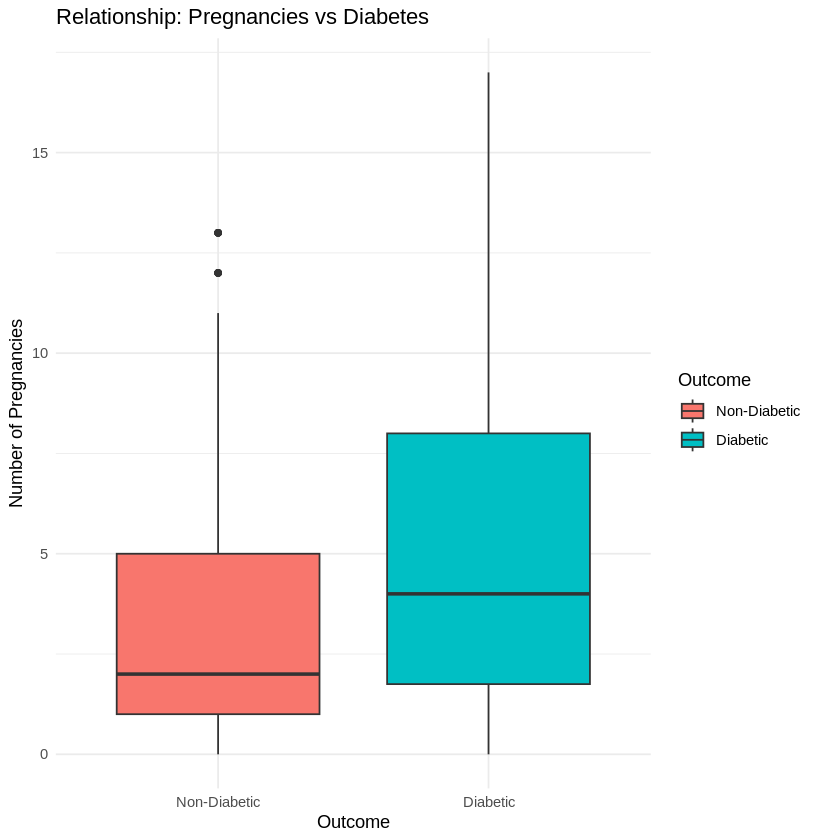

In [29]:
# Boxplot
ggplot(df, aes(x = Outcome, y = Pregnancies, fill = Outcome)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Relationship: Pregnancies vs Diabetes", y = "Number of Pregnancies")

##Answering Questions

Glucose Summary by Outcome:
# A tibble: 2 × 3
  Outcome      avg_glucose sd_glucose
  <fct>              <dbl>      <dbl>
1 Non-Diabetic        110.       26.1
2 Diabetic            141.       31.9


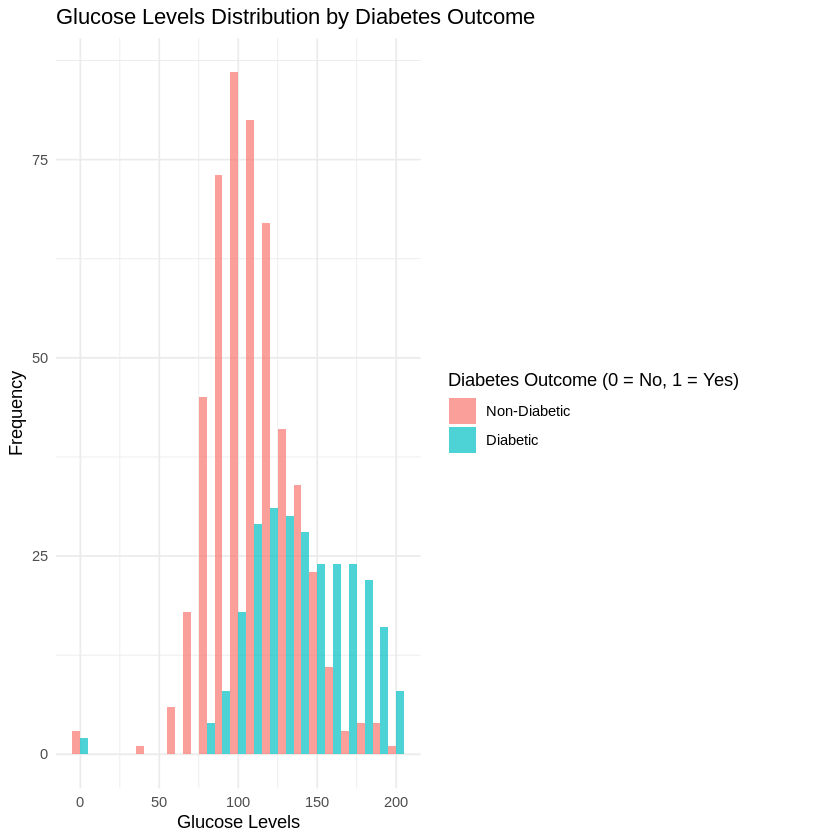

In [30]:
# Question 1: Are higher glucose levels associated with a greater likelihood of diabetes? ---
# Visualization: Glucose Distribution by Diabetes Outcome
ggplot(df, aes(x = Glucose, fill = as.factor(Outcome))) +
  geom_histogram(binwidth = 10, position = "dodge", alpha = 0.7) +
  labs(title = "Glucose Levels Distribution by Diabetes Outcome",
       x = "Glucose Levels", y = "Frequency",
       fill = "Diabetes Outcome (0 = No, 1 = Yes)") +
  theme_minimal()

# Statistical Summary
glucose_summary <- df %>%
  group_by(Outcome) %>%
  summarise(avg_glucose = mean(Glucose, na.rm = TRUE),
            sd_glucose = sd(Glucose, na.rm = TRUE))
cat("Glucose Summary by Outcome:\n")
print(glucose_summary)

`geom_smooth()` using formula = 'y ~ x'


Correlation Between Glucose and BMI:  0.2210711 


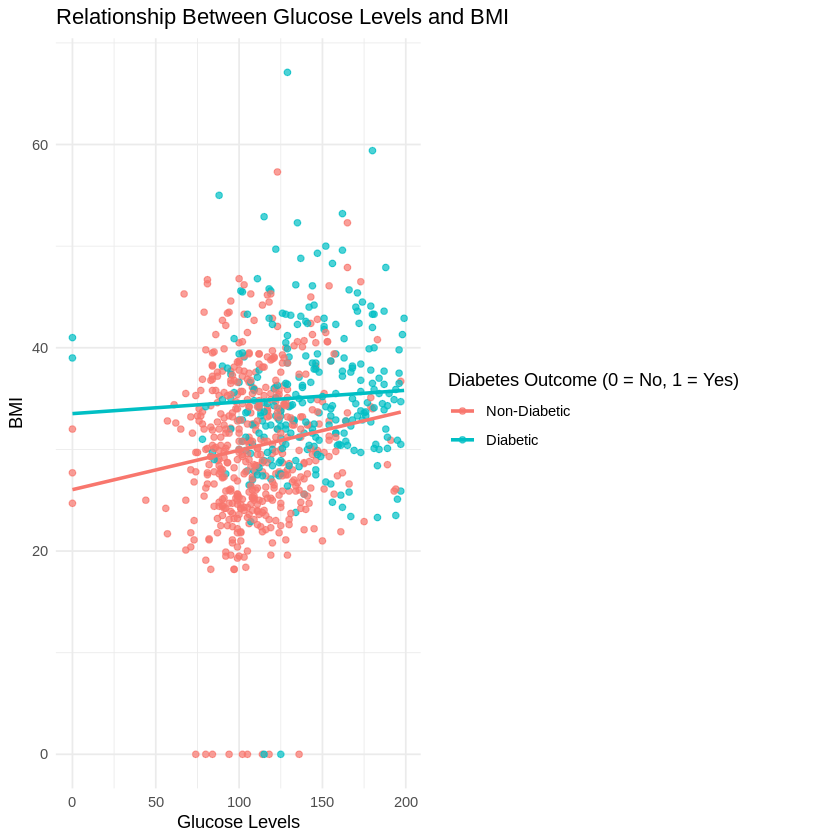

In [31]:
# Question 2: Are patients with high glucose concentrations also likely to have higher BMI values? ---
# Visualization: Scatterplot of Glucose vs. BMI
ggplot(df, aes(x = Glucose, y = BMI, color = as.factor(Outcome))) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Relationship Between Glucose Levels and BMI",
       x = "Glucose Levels", y = "BMI",
       color = "Diabetes Outcome (0 = No, 1 = Yes)") +
  theme_minimal()

# Correlation Analysis
glucose_bmi_corr <- cor(df$Glucose, df$BMI, use = "complete.obs")
cat("Correlation Between Glucose and BMI: ", glucose_bmi_corr, "\n")


Pregnancies Summary by Outcome:
# A tibble: 2 × 3
  Outcome      avg_pregnancies sd_pregnancies
  <fct>                  <dbl>          <dbl>
1 Non-Diabetic            3.30           3.02
2 Diabetic                4.87           3.74


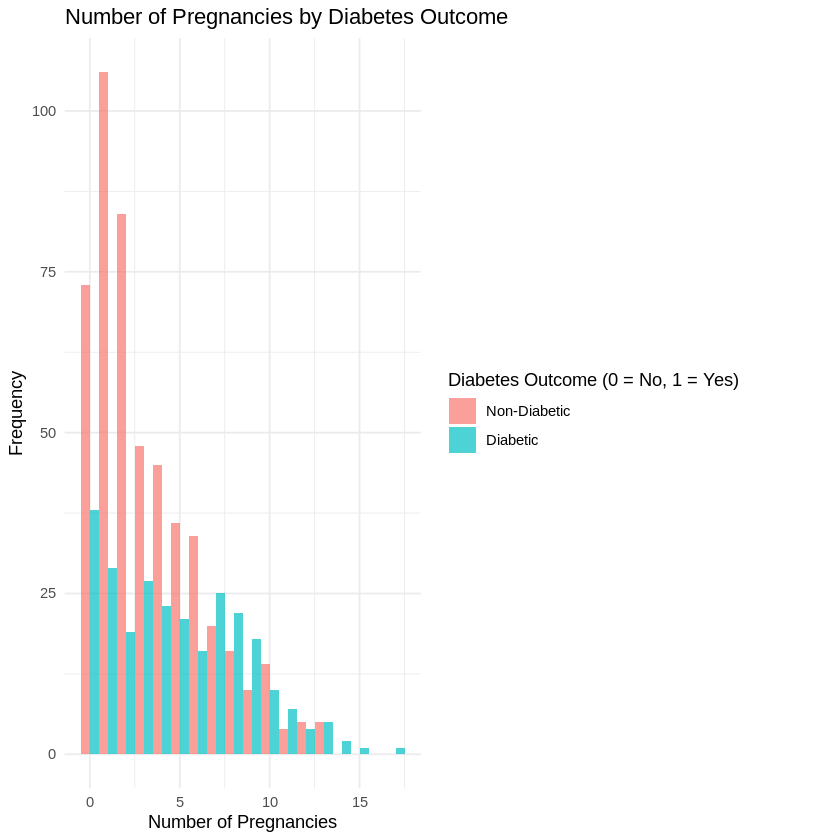

In [32]:
# Question 3: Are patients with a higher number of pregnancies at greater risk of developing diabetes? ---
# Visualization: Number of Pregnancies by Diabetes Outcome
ggplot(df, aes(x = Pregnancies, fill = as.factor(Outcome))) +
  geom_histogram(binwidth = 1, position = "dodge", alpha = 0.7) +
  labs(title = "Number of Pregnancies by Diabetes Outcome",
       x = "Number of Pregnancies", y = "Frequency",
       fill = "Diabetes Outcome (0 = No, 1 = Yes)") +
  theme_minimal()

# Statistical Summary
pregnancy_summary <- df %>%
  group_by(Outcome) %>%
  summarise(avg_pregnancies = mean(Pregnancies, na.rm = TRUE),
            sd_pregnancies = sd(Pregnancies, na.rm = TRUE))
cat("Pregnancies Summary by Outcome:\n")
print(pregnancy_summary)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


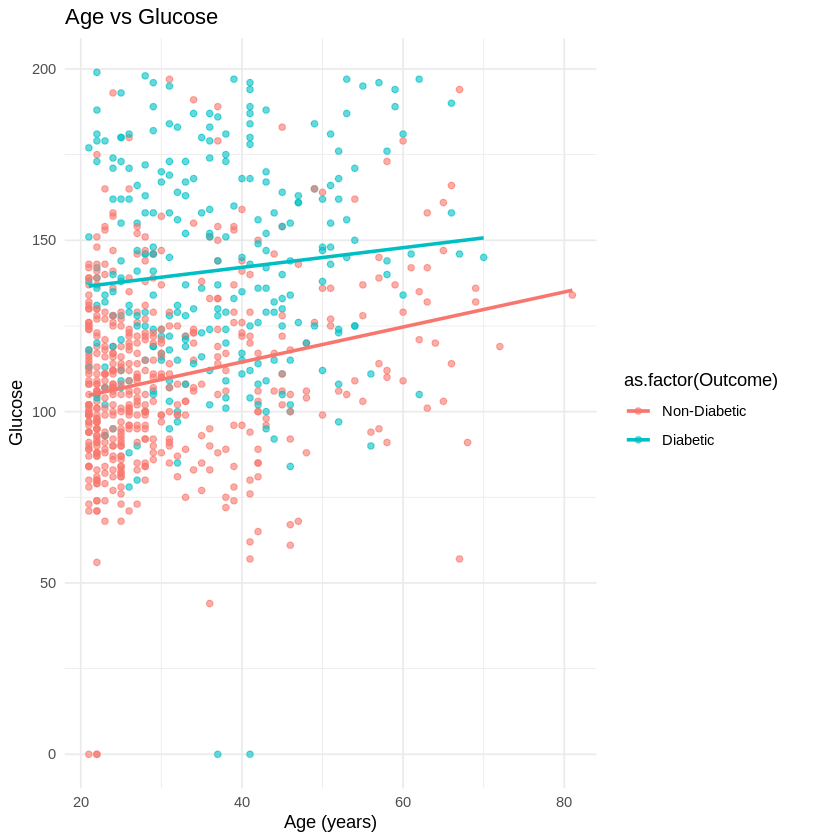

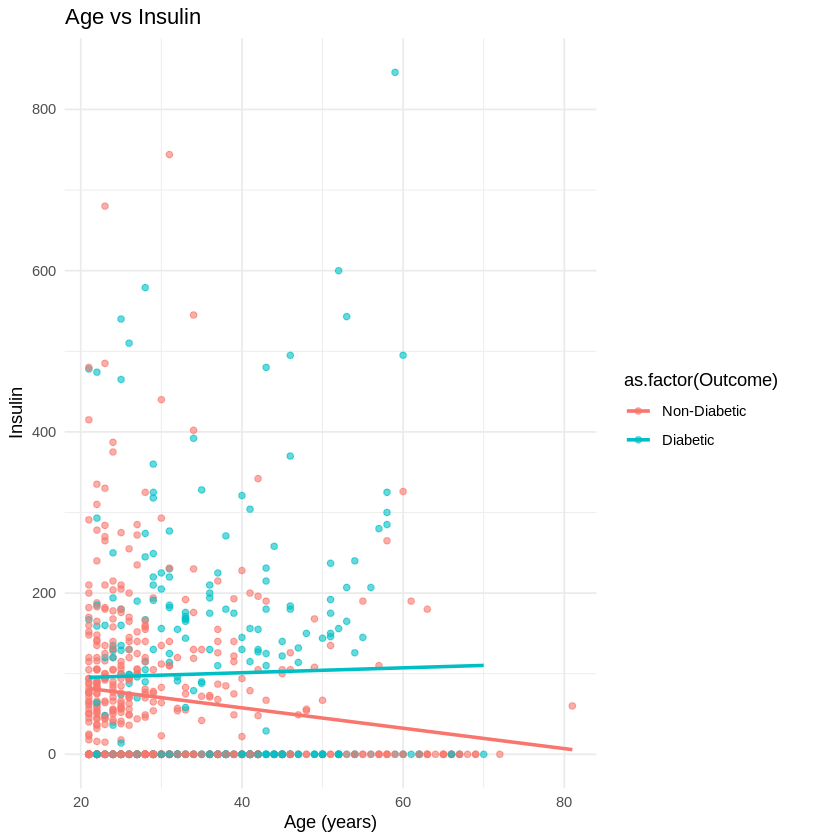

In [33]:
#Q4-Are older patients more likely to have higher insulin concentrations and blood glucose levels?

# Age vs Glucose
ggplot(df, aes(x = Age, y = Glucose, color =  as.factor(Outcome))) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(
    title = "Age vs Glucose",
    x = "Age (years)",
    y = "Glucose"
  ) +
  theme_minimal()

# Age vs Insulin
ggplot(df, aes(x = Age, y = Insulin, color =  as.factor(Outcome))) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(
    title = "Age vs Insulin",
    x = "Age (years)",
    y = "Insulin"
  ) +
  theme_minimal()

In [34]:
cor.test(df$Age, df$Glucose, use = "complete.obs")
cor.test(df$Age, df$Insulin, use = "complete.obs")


	Pearson's product-moment correlation

data:  df$Age and df$Glucose
t = 7.5604, df = 766, p-value = 1.15e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1964320 0.3281413
sample estimates:
      cor 
0.2635143 



	Pearson's product-moment correlation

data:  df$Age and df$Insulin
t = -1.168, df = 766, p-value = 0.2432
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.11257145  0.02866682
sample estimates:
        cor 
-0.04216295 


Risk Profile for Diabetic Patients:
  avg_glucose  avg_bmi  avg_age avg_pregnancies
1    141.2575 35.14254 37.06716        4.865672


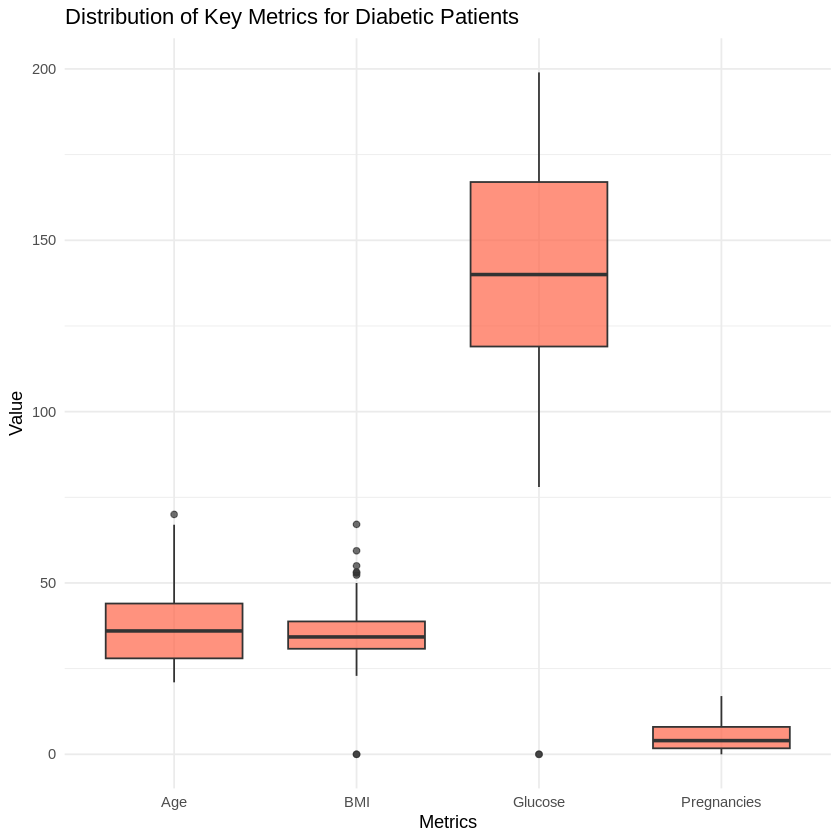

In [50]:
# Question 5: Identify common “risk profiles” for diabetic patients ---
# Risk Profiles: Summarize key metrics for diabetic patients
# The previous line 'df <- df %>% mutate(Outcome = as.numeric(as.character(Outcome)))' was incorrect and removed.
diabetic_profiles <- df %>%
  filter(Outcome == "Diabetic") %>% # Filter by the factor level "Diabetic"
  summarise(
    avg_glucose = mean(Glucose, na.rm = TRUE),
    avg_bmi = mean(BMI, na.rm = TRUE),
    avg_age = mean(Age, na.rm = TRUE),
    avg_pregnancies = mean(Pregnancies, na.rm = TRUE)
  )
cat("Risk Profile for Diabetic Patients:\n")
print(diabetic_profiles)

# Visualization: Risk Profiles (Boxplots for Key Metrics)
metrics <- df %>%
  select(Glucose, BMI, Age, Pregnancies, Outcome) %>%
  tidyr::gather(key = "Metric", value = "Value", -Outcome)

ggplot(metrics %>% filter(Outcome == "Diabetic"), aes(x = Metric, y = Value)) + # Filter by the factor level "Diabetic" for the plot
  geom_boxplot(fill = "tomato", alpha = 0.7) +
  labs(title = "Distribution of Key Metrics for Diabetic Patients",
       x = "Metrics", y = "Value") +
  theme_minimal()

# 2.2 Come up with 5 more bivariate/multivariate analysis questions and similarly answer each with appropriate visuals and commentary.

`geom_smooth()` using formula = 'y ~ x'


Correlation Between BMI and Blood Pressure:  0.2818053 


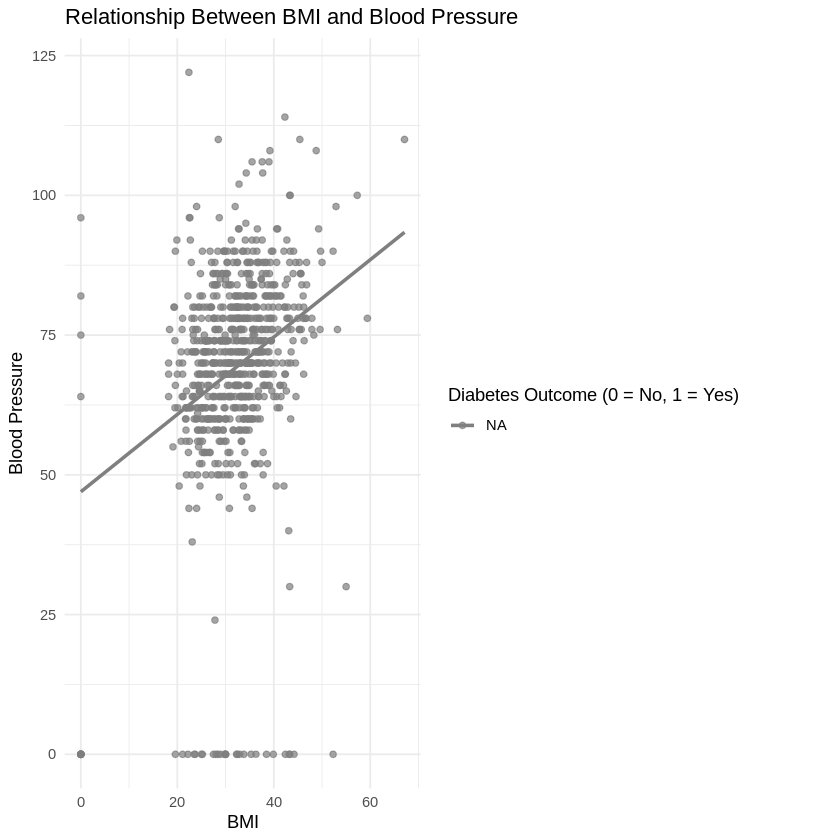

In [36]:
#1. Do higher BMI values correlate with higher blood pressure?
# Question: Are patients with higher BMI more likely to have higher blood pressure?

# Visualization: Scatterplot of BMI vs. Blood Pressure

ggplot(df, aes(x = BMI, y = BloodPressure, color = as.factor(Outcome))) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Relationship Between BMI and Blood Pressure",
       x = "BMI", y = "Blood Pressure",
       color = "Diabetes Outcome (0 = No, 1 = Yes)") +
  theme_minimal()

# Correlation Analysis
bmi_bp_corr <- cor(df$BMI, df$BloodPressure, use = "complete.obs")
cat("Correlation Between BMI and Blood Pressure: ", bmi_bp_corr, "\n")

`geom_smooth()` using formula = 'y ~ x'


Correlation Between DPF and Glucose:  0.1373373 


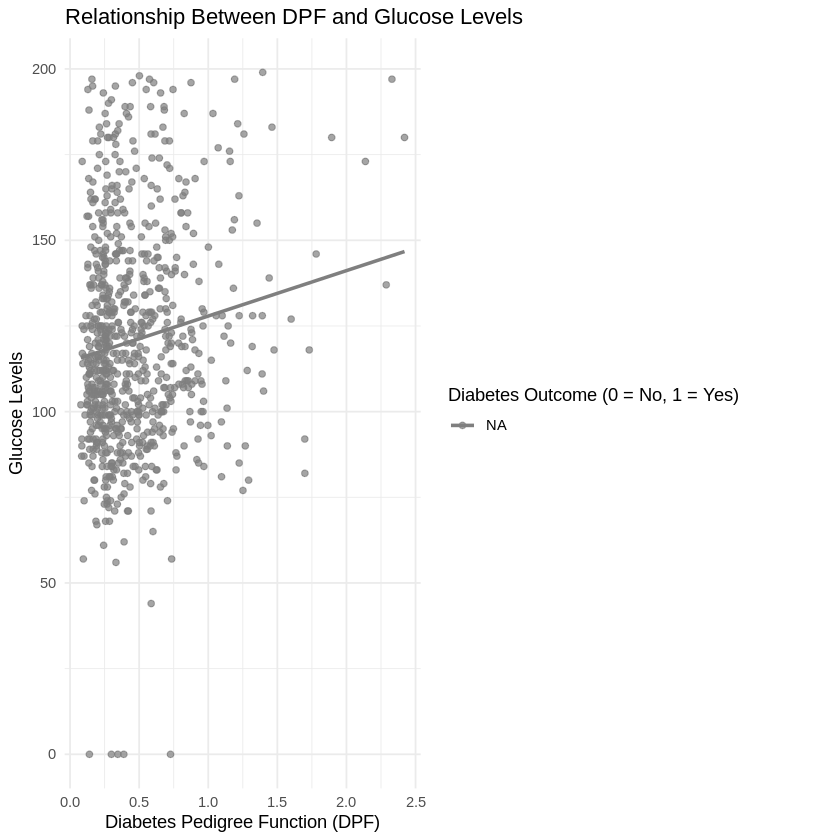

In [37]:
#2. Does the Diabetes Pedigree Function (DPF) correlate with glucose levels?
#Question: Are patients with higher DPF values more likely to have higher glucose levels?

# Visualization: Scatterplot of DPF vs. Glucose
ggplot(df, aes(x = DiabetesPedigreeFunction, y = Glucose, color = as.factor(Outcome))) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Relationship Between DPF and Glucose Levels",
       x = "Diabetes Pedigree Function (DPF)", y = "Glucose Levels",
       color = "Diabetes Outcome (0 = No, 1 = Yes)") +
  theme_minimal()

# Correlation Analysis
dpf_glucose_corr <- cor(df$DiabetesPedigreeFunction, df$Glucose, use = "complete.obs")
cat("Correlation Between DPF and Glucose: ", dpf_glucose_corr, "\n")

`summarise()` has grouped output by 'AgeGroup'. You can override using the
`.groups` argument.


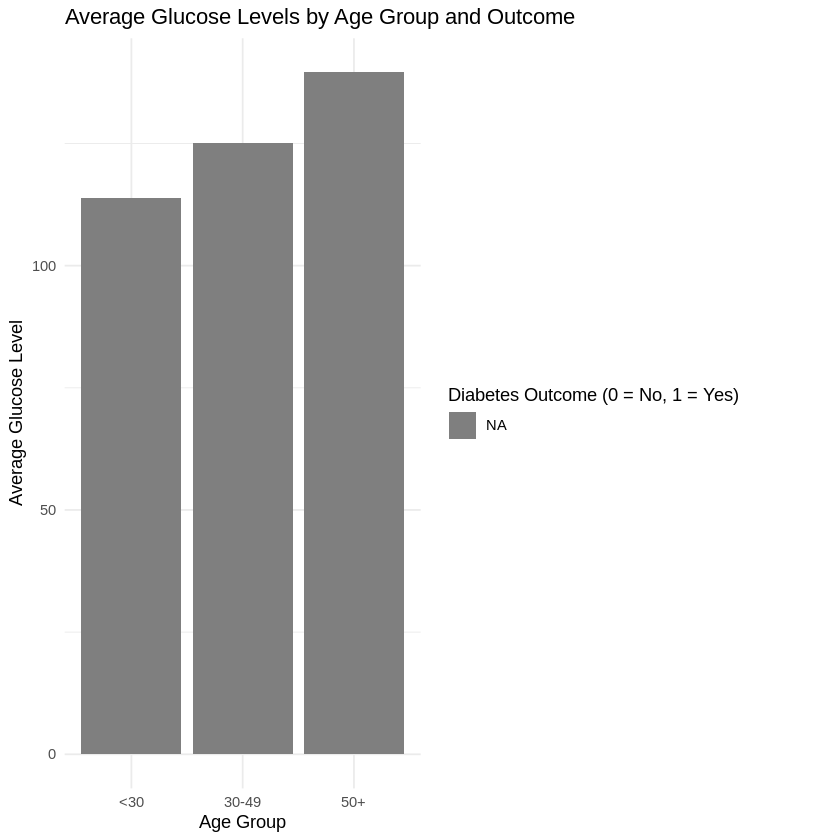

In [38]:
#3. How does the average glucose level vary across different age groups?
#Question: Do older patients tend to have higher glucose levels on average?

# Categorize Age into Groups
data <- df %>%
  mutate(AgeGroup = case_when(
    Age < 30 ~ "<30",
    Age >= 30 & Age < 50 ~ "30-49",
    Age >= 50 ~ "50+"
  ))

# Visualization: Average Glucose Levels by Age Group
avg_glucose_agegroup <- data %>%
  group_by(AgeGroup, Outcome) %>%
  summarise(avg_glucose = mean(Glucose, na.rm = TRUE))

ggplot(avg_glucose_agegroup, aes(x = AgeGroup, y = avg_glucose, fill = as.factor(Outcome))) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Average Glucose Levels by Age Group and Outcome",
       x = "Age Group", y = "Average Glucose Level",
       fill = "Diabetes Outcome (0 = No, 1 = Yes)") +
  theme_minimal()

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


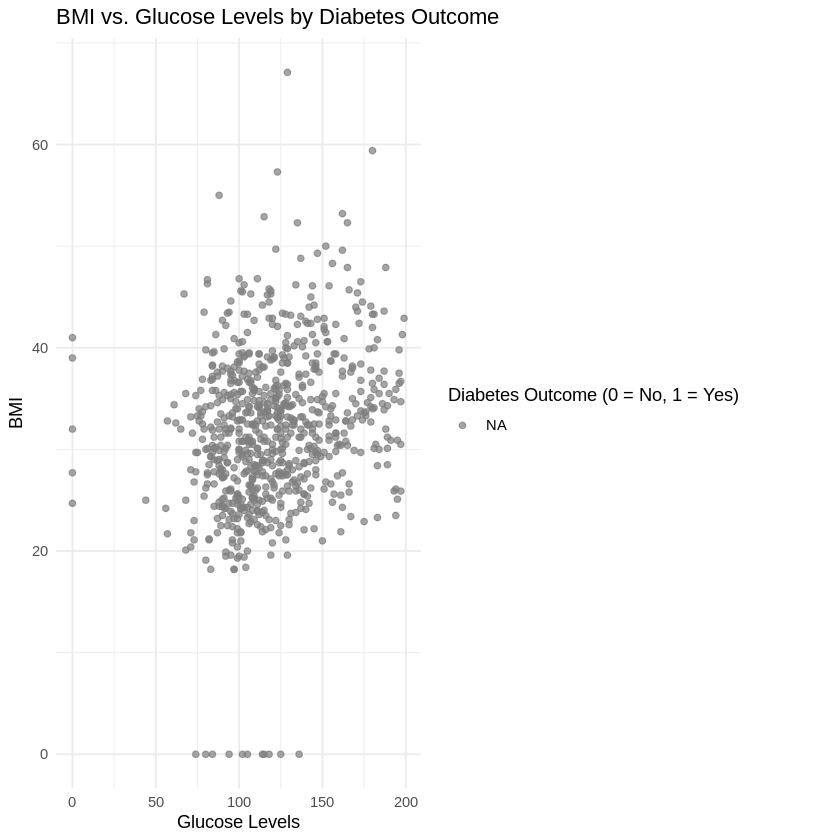

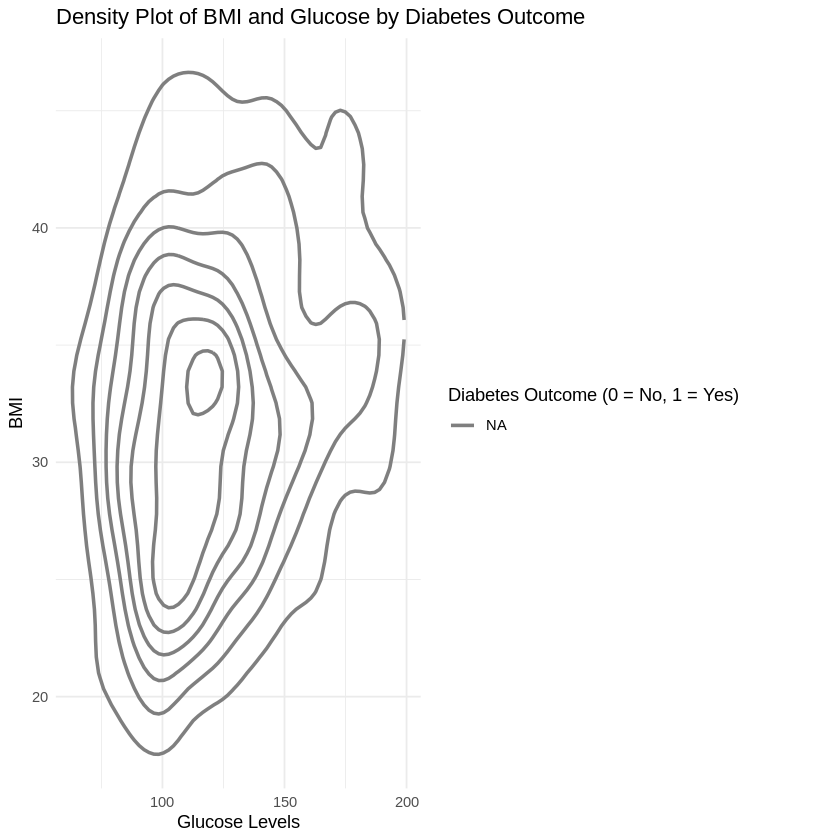

In [39]:
#4. Is there a combined effect of BMI and glucose levels on diabetes occurrence?
#Question: How do combinations of BMI and glucose levels influence the likelihood of diabetes?

# Visualization: BMI vs. Glucose with Outcome
ggplot(data, aes(x = Glucose, y = BMI, color = as.factor(Outcome))) +
  geom_point(alpha = 0.7) +
  labs(title = "BMI vs. Glucose Levels by Diabetes Outcome",
       x = "Glucose Levels", y = "BMI",
       color = "Diabetes Outcome (0 = No, 1 = Yes)") +
  theme_minimal()

# Add Contour Lines for Density
ggplot(data, aes(x = Glucose, y = BMI)) +
  geom_density_2d(aes(color = as.factor(Outcome)), size = 1) +
  labs(title = "Density Plot of BMI and Glucose by Diabetes Outcome",
       x = "Glucose Levels", y = "BMI",
       color = "Diabetes Outcome (0 = No, 1 = Yes)") +
  theme_minimal()


Summary of BMI and Glucose by Number of Pregnancies:
# A tibble: 17 × 3
   Pregnancies avg_bmi avg_glucose
         <int>   <dbl>       <dbl>
 1           0    34.3        123 
 2           1    31.4        113.
 3           2    30.6        111.
 4           3    30.4        124.
 5           4    32.1        125.
 6           5    33.2        119.
 7           6    30.3        121.
 8           7    32.6        136.
 9           8    31.6        132.
10           9    31.7        131.
11          10    30.6        121.
12          11    38.6        126.
13          12    32.3        114.
14          13    35          126.
15          14    35.1        138.
16          15    37.1        136 
17          17    40.9        163 


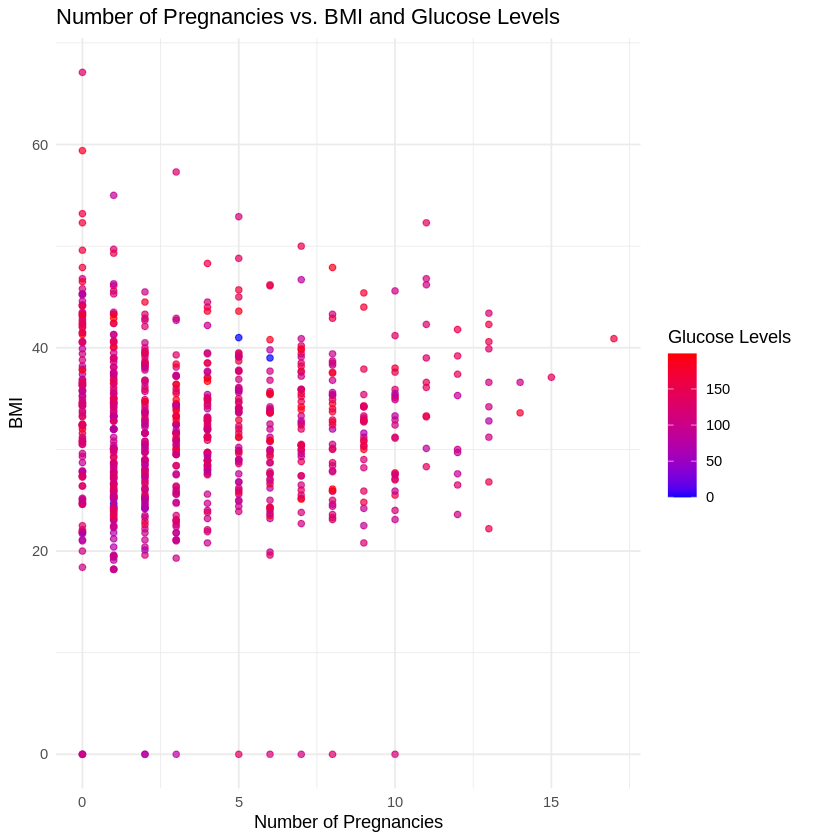

In [40]:
#5. How does the number of pregnancies influence BMI and glucose levels?
#Question: Do patients with a higher number of pregnancies show trends in BMI and glucose levels?

# Visualization: Pregnancies vs. BMI and Glucose
ggplot(data, aes(x = Pregnancies, y = BMI, color = Glucose)) +
  geom_point(alpha = 0.7) +
  scale_color_gradient(low = "blue", high = "red") +
  labs(title = "Number of Pregnancies vs. BMI and Glucose Levels",
       x = "Number of Pregnancies", y = "BMI",
       color = "Glucose Levels") +
  theme_minimal()

# Statistical Summary: Group Pregnancies
pregnancy_bmi_glucose <- data %>%
  group_by(Pregnancies) %>%
  summarise(avg_bmi = mean(BMI, na.rm = TRUE),
            avg_glucose = mean(Glucose, na.rm = TRUE))
cat("Summary of BMI and Glucose by Number of Pregnancies:\n")
print(pregnancy_bmi_glucose)


#Hypothesis Testing

In [41]:
data_diabetes=df

In [45]:
# Reload the dataset and set Outcome as a factor to ensure it's in the correct state
df <- read.csv("diabetes_dataset.csv")
df$Outcome <- as.factor(df$Outcome)
levels(df$Outcome) <- c("Non-Diabetic", "Diabetic")

data_diabetes=df
alpha = 0.05
# Correctly filter data based on factor levels. This assumes df$Outcome is still a factor.
# If cell QXlJeja0vf4m has already run and corrupted df$Outcome, you would need to re-run cell mEQEuyQUbANk first.
data_diabetic_group = df[df$Outcome == "Diabetic", ]
data_non_diabetic_group = df[df$Outcome == "Non-Diabetic", ]

#parameters for diabetic group
mean_glucose_diabetic = mean(data_diabetic_group$Glucose, na.rm = TRUE)
sd_glucose_diabetic = sd(data_diabetic_group$Glucose, na.rm = TRUE)
n_glucose_diabetic = nrow(data_diabetic_group)

#parameters for non-diabetic group
mean_glucose_non_diabetic = mean(data_non_diabetic_group$Glucose, na.rm = TRUE)
sd_glucose_non_diabetic = sd(data_non_diabetic_group$Glucose, na.rm = TRUE)
n_glucose_non_diabetic =  nrow(data_non_diabetic_group)

# Check if there's enough data in each group to prevent errors with sd() and df calculation
if (n_glucose_diabetic < 2 || n_glucose_non_diabetic < 2) {
  stop("Not enough data in one or both groups to perform t-test. Each group needs at least 2 observations.")
}

#calculations for Welch's t-test (handles unequal variances and sample sizes)
t_glucose_statistic = (mean_glucose_diabetic - mean_glucose_non_diabetic) / sqrt((sd_glucose_diabetic^2 / n_glucose_diabetic) + (sd_glucose_non_diabetic^2 / n_glucose_non_diabetic))

# Degrees of Freedom (Welch-Satterthwaite equation)
term1 = (sd_glucose_diabetic^2 / n_glucose_diabetic)
term2 = (sd_glucose_non_diabetic^2 / n_glucose_non_diabetic)
df_glucose = (term1 + term2)^2 / ((term1^2 / (n_glucose_diabetic - 1)) + (term2^2 / (n_glucose_non_diabetic - 1)))

# Critical t-value
t_glucose_critical = qt(1 - alpha / 2, df_glucose)

cat("Degrees of Freedom:", df_glucose, "\n")
cat("Calculated t-statistic:", t_glucose_statistic, "\n")
cat("Critical t-value:", t_glucose_critical, "\n")

if (abs(t_glucose_statistic) > t_glucose_critical) {
  print("Reject the null hypothesis. There is a significant difference.")
} else {
  print("Accept the null hypothesis. There is no significant difference.")
}


Degrees of Freedom: 461.3317 
Calculated t-statistic: 13.75154 
Critical t-value: 1.965119 
[1] "Reject the null hypothesis. There is a significant difference."


#Simulation Task

In [46]:
library(dplyr)
library(ggplot2)

# Load the dataset
data <- read.csv("/content/diabetes_dataset.csv")
true_mean <- mean(data$Glucose, na.rm = TRUE)
print(true_mean)
results_15 <- data.frame(
  Sample = integer(),
  Mean = numeric(),
  Lower_CI = numeric(),
  Upper_CI = numeric(),
  Contains_True_Mean = logical()
)

set.seed(123)
for (i in 1:25) {
  sample_data <- sample(data$Glucose, size = 15, replace = TRUE)
  sample_mean <- mean(sample_data)
  sample_sd <- sd(sample_data)

  #95% confidence interval
  error <- 1.96 * (sample_sd / sqrt(15))
  ci_lower <- sample_mean - error
  ci_upper <- sample_mean + error
  contains_true <- ci_lower <= true_mean && ci_upper >= true_mean

  results_15 <- rbind(
    results_15,
    data.frame(
      Sample = i,
      Mean = sample_mean,
      Lower_CI = ci_lower,
      Upper_CI = ci_upper,
      Contains_True_Mean = contains_true
    )
  )
}
coverage_15 <- mean(results_15$Contains_True_Mean)
print(results_15)
cat("Coverage Proportion (Sample Size 15):", coverage_15, "\n")

[1] 120.8945
   Sample     Mean  Lower_CI Upper_CI Contains_True_Mean
1       1 116.2000  97.31665 135.0834               TRUE
2       2 112.1333  94.72837 129.5383               TRUE
3       3 127.8000 110.89155 144.7084               TRUE
4       4 123.7333 110.70761 136.7591               TRUE
5       5 123.0000 104.94185 141.0582               TRUE
6       6 122.0667 108.14355 135.9898               TRUE
7       7 135.2000 122.87016 147.5298              FALSE
8       8 130.6667 115.75242 145.5809               TRUE
9       9 115.1333  96.83480 133.4319               TRUE
10     10 115.4667 102.75741 128.1759               TRUE
11     11 116.8667  99.12443 134.6089               TRUE
12     12 124.0000 111.92229 136.0777               TRUE
13     13 118.0000 101.07555 134.9245               TRUE
14     14 130.8667 113.99866 147.7347               TRUE
15     15 110.2667  99.39842 121.1349               TRUE
16     16 128.3333 110.10211 146.5646               TRUE
17     17 119.6000

In [47]:
results_100 <- data.frame(
  Sample = integer(),
  Mean = numeric(),
  Lower_CI = numeric(),
  Upper_CI = numeric(),
  Contains_True_Mean = logical()
)
for (i in 1:25) {
  sample_data <- sample(data$Glucose, size = 100, replace = TRUE)
  sample_mean <- mean(sample_data)
  sample_sd <- sd(sample_data)
  error <- 1.96 * (sample_sd / sqrt(15))
  ci_lower <- sample_mean - error
  ci_upper <- sample_mean + error
  contains_true <- ci_lower <= true_mean && ci_upper >= true_mean

  results_100 <- rbind(results_100, data.frame(Sample = i,
  Mean = sample_mean,
  Lower_CI = ci_lower,
  Upper_CI = ci_upper,
  Contains_True_Mean = contains_true))
}

coverage_100 <- mean(results_100$Contains_True_Mean)

print(results_100)
cat("Coverage Proportion (Size 100):", coverage_100, "\n")

   Sample   Mean  Lower_CI Upper_CI Contains_True_Mean
1       1 123.22 108.98255 137.4574               TRUE
2       2 123.74 108.20027 139.2797               TRUE
3       3 121.91 104.97136 138.8486               TRUE
4       4 121.24 106.53534 135.9447               TRUE
5       5 121.87 108.35974 135.3803               TRUE
6       6 114.78  96.59580 132.9642               TRUE
7       7 122.92 107.02442 138.8156               TRUE
8       8 115.34 101.35228 129.3277               TRUE
9       9 115.38  99.22995 131.5300               TRUE
10     10 120.89 104.99129 136.7887               TRUE
11     11 119.98 103.68639 136.2736               TRUE
12     12 118.05  99.48458 136.6154               TRUE
13     13 116.41 101.60261 131.2174               TRUE
14     14 118.60 104.80919 132.3908               TRUE
15     15 118.76 102.18071 135.3393               TRUE
16     16 121.40 106.32546 136.4745               TRUE
17     17 127.15 111.89560 142.4044               TRUE
18     18 

In [48]:
results_10 <- data.frame(
  Sample = integer(),
  Mean = numeric(),
  Lower_CI = numeric(),
  Upper_CI = numeric(),
  Contains_True_Mean = logical()
)
for (i in 1:20) {
  sample_data <- sample(data$Glucose, size = 10, replace = TRUE)
  sample_mean <- mean(sample_data)
  sample_sd <- sd(sample_data)
  error <- 1.96 * (sample_sd / sqrt(15))
  ci_lower <- sample_mean - error
  ci_upper <- sample_mean + error
  contains_true <- ci_lower <= true_mean && ci_upper >= true_mean

  results_10 <- rbind(results_10, data.frame(Sample = i,
  Mean = sample_mean,
  Lower_CI = ci_lower,
  Upper_CI = ci_upper,
  Contains_True_Mean = contains_true))
}

coverage_10 <- mean(results_10$Contains_True_Mean)

print(results_10)
cat("Coverage Proportion (Size 10):", coverage_10, "\n")

   Sample  Mean  Lower_CI Upper_CI Contains_True_Mean
1       1 123.1 108.79722 137.4028               TRUE
2       2 127.4  97.88341 156.9166               TRUE
3       3 106.0 100.53382 111.4662              FALSE
4       4 111.4  96.25882 126.5412               TRUE
5       5 139.3 119.33741 159.2626               TRUE
6       6 122.6 104.62807 140.5719               TRUE
7       7 125.8 111.47664 140.1234               TRUE
8       8 106.5  95.26659 117.7334              FALSE
9       9 109.1  97.23533 120.9647               TRUE
10     10 147.3 132.81809 161.7819              FALSE
11     11 119.8 107.68764 131.9124               TRUE
12     12 134.4 121.34597 147.4540              FALSE
13     13 150.1 136.39878 163.8012              FALSE
14     14 108.9  95.97027 121.8297               TRUE
15     15 127.9 111.21342 144.5866               TRUE
16     16 119.8  98.33087 141.2691               TRUE
17     17  99.3  86.10752 112.4925              FALSE
18     18 122.9 108.09473 13

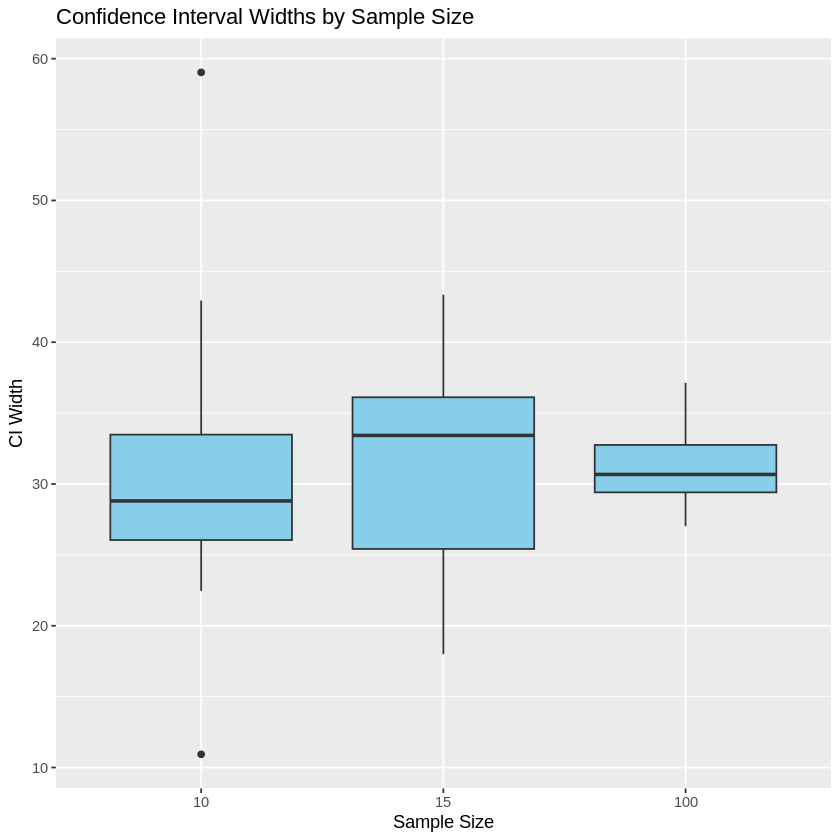

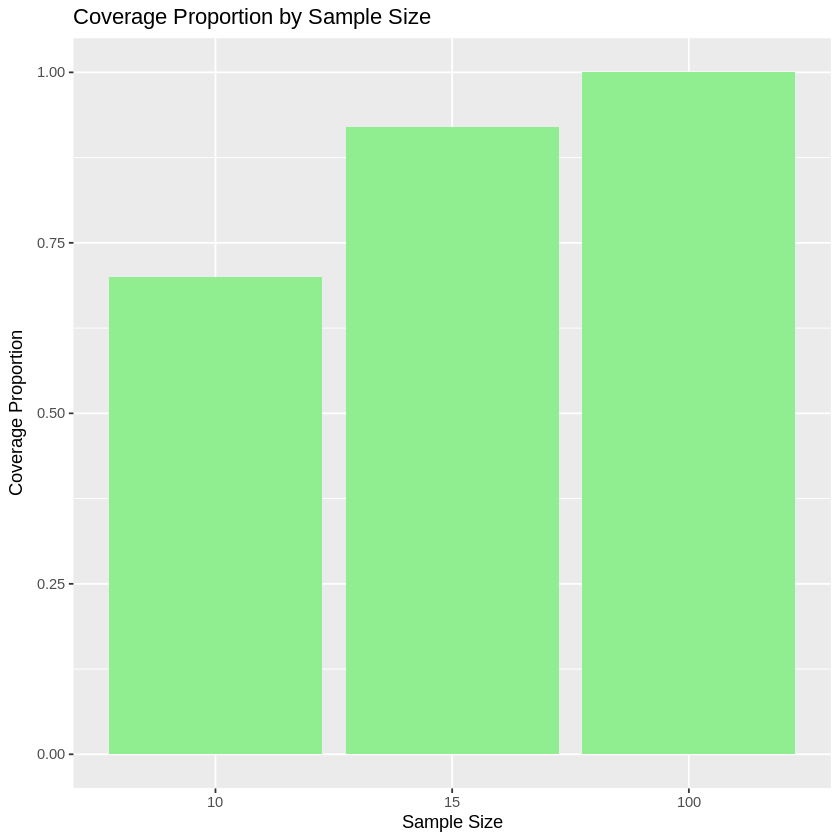

In [49]:
results_15$Sample_Size <- 15
results_100$Sample_Size <- 100
results_10$Sample_Size <- 10
combined_results <- rbind(results_15, results_100, results_10)
combined_results <- combined_results %>%
  mutate(CI_Width = Upper_CI - Lower_CI)

ggplot(combined_results, aes(x = factor(Sample_Size), y = CI_Width)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Confidence Interval Widths by Sample Size",
       x = "Sample Size",
       y = "CI Width")

coverage_df <- data.frame(Sample_Size = c(10, 15, 100), Coverage = c(coverage_10, coverage_15, coverage_100))

ggplot(coverage_df, aes(x = factor(Sample_Size), y = Coverage)) +
  geom_col(fill = "lightgreen") +
  labs(title = "Coverage Proportion by Sample Size",
       x = "Sample Size",
       y = "Coverage Proportion")
# this show a comparison for the three coverage propotion by sample size and also shows confidence intreval widths by sample size